# Coiled Notebook Demo

Uses `earthaccess` package to open 10 files from the MUR 0.25 degree resolution product (https://doi.org/10.5067/GHM25-4FJ42). Can be run locally or on an AWS EC2 instance. 

In [1]:
import earthaccess
import xarray as xr

#######################
import eofs # Showing that we can install a non-standard package and it will show up on our Coiled Notebook
#######################

In [2]:
## EDL login:
earthaccess.login()

In [3]:
%%time

## Access info for all granules:
datainfo = earthaccess.search_data(
    short_name="MUR25-JPL-L4-GLOB-v04.2",
    cloud_hosted=True,
    )

Granules found: 7904
CPU times: user 546 ms, sys: 53.8 ms, total: 600 ms
Wall time: 14.9 s


In [4]:
datainfo[0]

Collection: {'Version': '4.2', 'ShortName': 'MUR25-JPL-L4-GLOB-v04.2'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180, 'SouthBoundingCoordinate': -90, 'EastBoundingCoordinate': 180, 'NorthBoundingCoordinate': 90}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2002-09-01T21:00:00.000Z', 'BeginningDateTime': '2002-08-31T21:00:00.000Z'}}
Size(MB): 1.8629217147827148
Data: ['https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MUR25-JPL-L4-GLOB-v04.2/20020901090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc']

In [5]:
%%time

## Generate file objects from the endpoints which are compatible with Xarray, for first 10 files:
file_objs = earthaccess.open(datainfo[:10])
file_objs[0] # show endpoint, should be s3 if in cloud in us-west-2, and https otherwise.

Opening 10 granules, approx size: 0.02 GB


QUEUEING TASKS | :   0%|          | 0/10 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/10 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/10 [00:00<?, ?it/s]

CPU times: user 130 ms, sys: 31.9 ms, total: 162 ms
Wall time: 1.87 s


<File-like object HTTPFileSystem, https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/MUR25-JPL-L4-GLOB-v04.2/20020901090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc>

In [6]:
%%time

## Open first 10 files and concatenate them along the time dimension, into a single dataset object:
mur_data = xr.open_mfdataset(file_objs)
mur_data["analysed_sst"]

CPU times: user 645 ms, sys: 148 ms, total: 793 ms
Wall time: 17.5 s


<xarray.DataArray 'analysed_sst' (time: 10, lat: 720, lon: 1440)>
dask.array<concatenate, shape=(10, 720, 1440), dtype=float32, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2002-09-01T09:00:00 ... 2002-09-10T09:00:00
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Attributes:
    long_name:              analysed sea surface temperature
    standard_name:          sea_surface_foundation_temperature
    coverage_content_type:  physicalMeasurement
    units:                  kelvin
    valid_min:              -32767
    valid_max:              32767
    comment:                "Final" version using Multi-Resolution Variationa...
    source:                 MODIS_T-JPL, MODIS_A-JPL, AMSRE-REMSS, AVHRR17_G-...

CPU times: user 533 ms, sys: 105 ms, total: 638 ms
Wall time: 686 ms


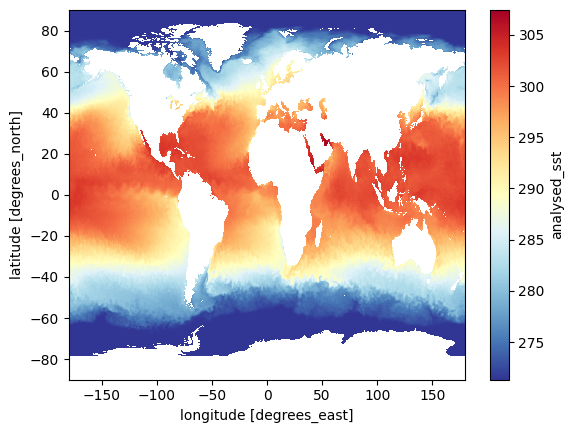

In [7]:
%%time

mur_data["analysed_sst"].mean(dim='time').plot(cmap="RdYlBu_r")